In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [2]:
# Use Pandas to read the Train CSV
train_data = pd.read_csv("../train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
encoded_df = pd.get_dummies(data=train_data, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'])
encoded_df

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,1458,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,1459,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [5]:
correlations = encoded_df.corr()
correlations

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
LotFrontage,-0.010601,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,-0.051807,0.128311,-0.023466,-0.094298,-0.023965,-0.037030,-0.019817,0.016684,-0.076258,0.126571
LotArea,-0.033226,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,0.012609,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,-0.037030,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,-0.015130,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,-0.019817,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.010116,0.021369,-0.026277,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.016684,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009915,0.000765,-0.007929,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,-0.076258,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084801,-0.019560,0.041207,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [6]:
highest_corr = correlations.loc[(correlations["SalePrice"]>.6) | (correlations["SalePrice"]<-.6)]["SalePrice"]
highest_corr

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

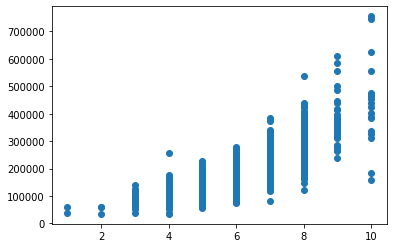

In [7]:
# Compare sale price to the overall quality
sale_price = encoded_df["SalePrice"]
quality = encoded_df["OverallQual"]

plt.scatter(quality, sale_price)
plt.show()

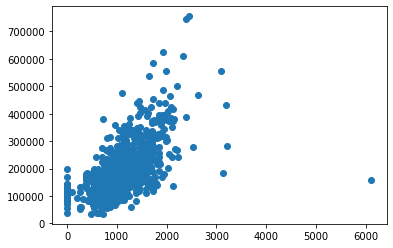

In [8]:
# Compare sale price to the total square feet of basement area
sale_price = encoded_df["SalePrice"]
bsmt_sf = encoded_df["TotalBsmtSF"]

plt.scatter(bsmt_sf, sale_price)
plt.show()

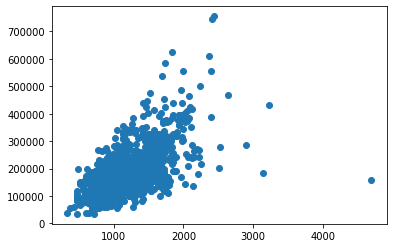

In [9]:
# Compare sale price to the first Floor square feet
sale_price = encoded_df["SalePrice"]
first_floor = encoded_df["1stFlrSF"]

plt.scatter(first_floor, sale_price)
plt.show()

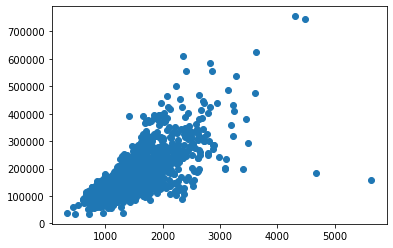

In [10]:
# Compare sale price to the above grade (ground) living area square feet
sale_price = encoded_df["SalePrice"]
ground_sf = encoded_df["GrLivArea"]

plt.scatter(ground_sf, sale_price)
plt.show()

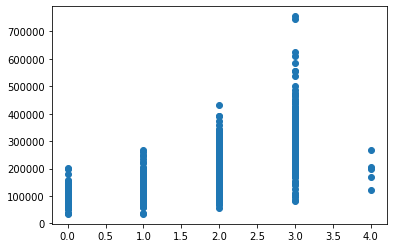

In [11]:
# Compare sale price to the size of garage in car capacity
sale_price = encoded_df["SalePrice"]
grg_car = encoded_df["GarageCars"]

plt.scatter(grg_car, sale_price)
plt.show()

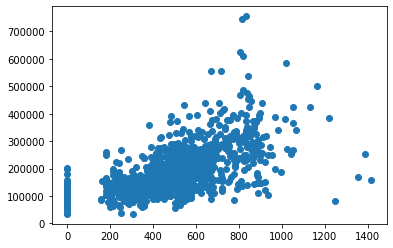

In [12]:
# Compare sale price to the size of garage in square feet
sale_price = encoded_df["SalePrice"]
grg_sf = encoded_df["GarageArea"]

plt.scatter(grg_sf, sale_price)
plt.show()

In [24]:
train_x = encoded_df[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea']]
train_y = encoded_df['SalePrice']

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(train_x, train_y)

score = model.score(train_x, train_y)
print(f"R2 Score: {score}")

R2 Score: 0.7619179511862831


In [28]:
predict = model.predict(train_x)
predictions = np.concatenate(predict, axis=0)

In [29]:
pd.DataFrame({"Predicted": predictions, "Actual": train_y, "Error": predictions - train_y})[["Predicted", "Actual", "Error"]]

,Predicted,Actual,Error
0,207136.372363,208500,-1363.627637
1,176885.986158,181500,-4614.013842
2,213630.455365,223500,-9869.544635
3,222161.279782,140000,82161.279782
4,281485.447445,250000,31485.447445
...,...,...,...
1455,182495.102964,175000,7495.102964
1456,228386.395152,210000,18386.395152
1457,226085.463525,266500,-40414.536475
1458,120446.967571,142125,-21678.032429


In [3]:
# Use Pandas to read the Train CSV
test_data = pd.read_csv("../test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
test_x = test_data[['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea']]
# predicted_y = model.predict(test_x)
test_x

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,5,882.0,896,896,1.0,730.0
1,6,1329.0,1329,1329,1.0,312.0
2,5,928.0,928,1629,2.0,482.0
3,6,926.0,926,1604,2.0,470.0
4,8,1280.0,1280,1280,2.0,506.0
...,...,...,...,...,...,...
1454,4,546.0,546,1092,0.0,0.0
1455,4,546.0,546,1092,1.0,286.0
1456,5,1224.0,1224,1224,2.0,576.0
1457,5,912.0,970,970,0.0,0.0


In [17]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

NameError: name 'X_train' is not defined